Dataset loaded successfully!

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0   

Data types:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object 

Missing values count:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64 

Basic statistics:
       sepal length (cm)  sepal width (cm)  petal

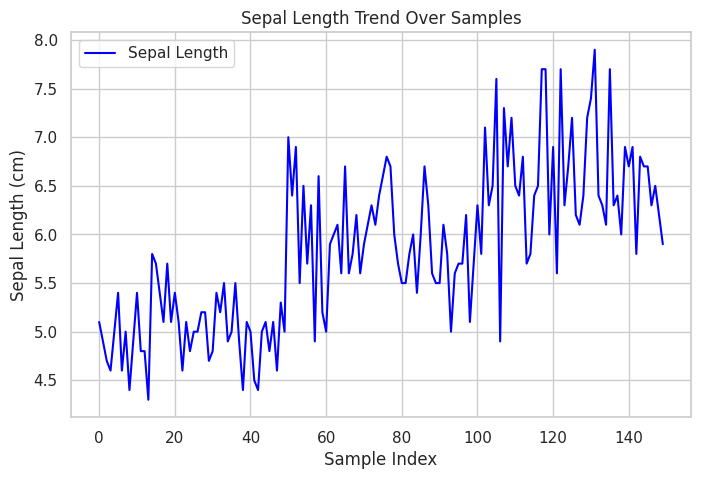

/tmp/ipython-input-2263830801.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="species", y="petal length (cm)", data=df, palette="viridis")


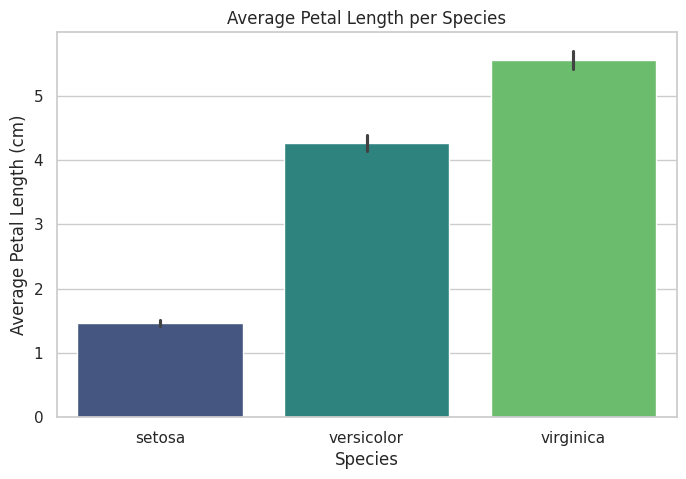

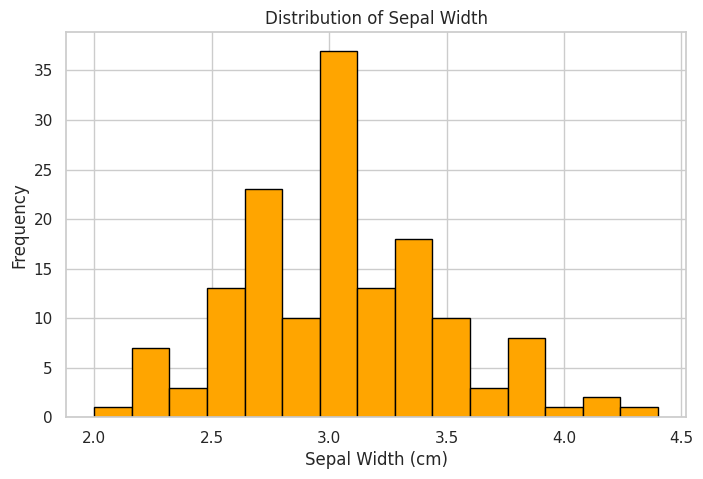

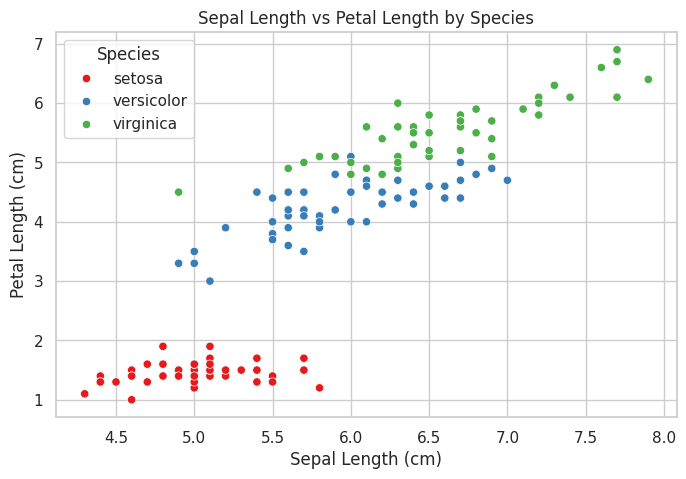

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# =====================
# Task 1: Load & Explore
# =====================
try:
    # Load the Iris dataset from sklearn
    iris_data = load_iris(as_frame=True)
    df = iris_data.frame  # Convert to pandas DataFrame
    print("Dataset loaded successfully!\n")
except FileNotFoundError:
    print("Error: File not found!")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

# Display first 5 rows
print("First 5 rows of the dataset:")
print(df.head(), "\n")

# Explore data types & missing values
print("Data types:")
print(df.dtypes, "\n")
print("Missing values count:")
print(df.isnull().sum(), "\n")

# Clean dataset (if missing values)
df.fillna(df.mean(numeric_only=True), inplace=True)

# =====================
# Task 2: Basic Analysis
# =====================
print("Basic statistics:")
print(df.describe(), "\n")

# Group by species and compute mean of numerical columns
group_means = df.groupby("target").mean()
print("Average measurements per species:")
print(group_means, "\n")

# Replace species code with actual names
df["species"] = df["target"].map(lambda x: iris_data.target_names[x])

# Pattern finding (example)
print("Observation: Setosa generally has smaller petal measurements compared to other species.\n")

# =====================
# Task 3: Data Visualization
# =====================
sns.set(style="whitegrid")  # Seaborn style

# 1. Line Chart - Show sepal length trends (index as a proxy for time)
plt.figure(figsize=(8, 5))
plt.plot(df.index, df["sepal length (cm)"], label="Sepal Length", color="blue")
plt.title("Sepal Length Trend Over Samples")
plt.xlabel("Sample Index")
plt.ylabel("Sepal Length (cm)")
plt.legend()
plt.show()

# 2. Bar Chart - Average petal length per species
plt.figure(figsize=(8, 5))
sns.barplot(x="species", y="petal length (cm)", data=df, palette="viridis")
plt.title("Average Petal Length per Species")
plt.xlabel("Species")
plt.ylabel("Average Petal Length (cm)")
plt.show()

# 3. Histogram - Distribution of sepal width
plt.figure(figsize=(8, 5))
plt.hist(df["sepal width (cm)"], bins=15, color="orange", edgecolor="black")
plt.title("Distribution of Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.show()

# 4. Scatter Plot - Sepal length vs Petal length
plt.figure(figsize=(8, 5))
sns.scatterplot(x="sepal length (cm)", y="petal length (cm)", hue="species", data=df, palette="Set1")
plt.title("Sepal Length vs Petal Length by Species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Species")
plt.show()
